# Pips and imports

In [ ]:
%pip install torch==1.9.1+cu111 torchvision==0.10.1+cu111 -f https://download.pytorch.org/whl/torch_stable.html
%pip install pandas==1.3.3 pytorch-fid==0.2.1
%pip install wandb

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms.functional as F_
import numpy as np
import os
import PIL

from torchvision import transforms

In [2]:
#from generator import *
#from discriminator import *
#from losses import *
#from training import *
#from dataset import *
from pix2pix import *

In [ ]:
from utils_real_fake import *

# Dataset



In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_batch_size, val_batch_size, test_batch_size = 1,1,1

train_transform=transforms.Compose([

    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

])

val_transform=transforms.Compose([

    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

])
#Путь для Колаба
train_dataset = ImageTrainDataSet('/content/drive/MyDrive/funkopop_gan/funko_pop_dataset/train', transform=train_transform, aug=False)
val_dataset = ImageTrainDataSet('/content/drive/MyDrive/funkopop_gan/funko_pop_dataset/val', transform=val_transform, aug=False)


train_loader = torch.utils.data.DataLoader(
    train_dataset,
    shuffle=True,
    batch_size=train_batch_size)


val_loader = torch.utils.data.DataLoader(
    val_dataset,
    shuffle=True,
    batch_size=val_batch_size)



# Training without discriminator



In [4]:
#!g1.1
#wandb.init(project='funkopops L1')
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
g = UNetModel().to(DEVICE)

g_opt = torch.optim.Adam(g.parameters(), lr=0.0002, betas=(0.5, 0.999))

train_g(g,
          n_epochs=50,
          generator_opt=g_opt,

          train_loader=train_loader,
          val_loader=val_loader,
          num_model=1234567,

          logging=False,
          path_last_epoch='try_',
          path_best_model = 'best_try'
          )

100%|██████████| 1000/1000 [01:08<00:00, 14.50it/s]



epoch 0/50 0.23320745082199573


100%|██████████| 100/100 [00:42<00:00,  2.37it/s]



validation 0/50 0.2138378329575062


100%|██████████| 1000/1000 [01:08<00:00, 14.65it/s]



epoch 1/50 0.20420238448679448


100%|██████████| 100/100 [00:02<00:00, 36.83it/s]



validation 1/50 0.19924537613987922


100%|██████████| 1000/1000 [01:08<00:00, 14.66it/s]



epoch 2/50 0.19378968241065742


100%|██████████| 100/100 [00:02<00:00, 36.50it/s]



validation 2/50 0.19695981591939926


100%|██████████| 1000/1000 [01:08<00:00, 14.68it/s]



epoch 3/50 0.18879846385121346


100%|██████████| 100/100 [00:02<00:00, 36.51it/s]



validation 3/50 0.18457060769200326


100%|██████████| 1000/1000 [01:07<00:00, 14.71it/s]



epoch 4/50 0.18335862945020198


100%|██████████| 100/100 [00:02<00:00, 36.66it/s]



validation 4/50 0.18336966566741467


100%|██████████| 1000/1000 [01:08<00:00, 14.67it/s]



epoch 5/50 0.1809179268181324


100%|██████████| 100/100 [00:02<00:00, 36.55it/s]



validation 5/50 0.18105665393173695


100%|██████████| 1000/1000 [01:07<00:00, 14.72it/s]



epoch 6/50 0.1761381579861045


100%|██████████| 100/100 [00:02<00:00, 36.75it/s]



validation 6/50 0.17980815909802914


100%|██████████| 1000/1000 [01:08<00:00, 14.70it/s]



epoch 7/50 0.17175732869654894


100%|██████████| 100/100 [00:02<00:00, 36.63it/s]



validation 7/50 0.17920281939208507


100%|██████████| 1000/1000 [01:08<00:00, 14.68it/s]



epoch 8/50 0.1700389986485243


100%|██████████| 100/100 [00:02<00:00, 36.81it/s]



validation 8/50 0.1790311650931835


100%|██████████| 1000/1000 [01:08<00:00, 14.68it/s]



epoch 9/50 0.16689672230184077


100%|██████████| 100/100 [00:02<00:00, 36.54it/s]



validation 9/50 0.17636128574609755


100%|██████████| 1000/1000 [01:07<00:00, 14.72it/s]



epoch 10/50 0.16217980348318814


100%|██████████| 100/100 [00:02<00:00, 36.93it/s]



validation 10/50 0.17784337282180787


100%|██████████| 1000/1000 [01:08<00:00, 14.70it/s]



epoch 11/50 0.15885986575484276


100%|██████████| 100/100 [00:02<00:00, 36.96it/s]



validation 11/50 0.17490469299256803


100%|██████████| 1000/1000 [01:08<00:00, 14.68it/s]



epoch 12/50 0.1547422522008419


100%|██████████| 100/100 [00:02<00:00, 36.20it/s]



validation 12/50 0.1742761643975973


100%|██████████| 1000/1000 [01:08<00:00, 14.68it/s]



epoch 13/50 0.15113359650224448


100%|██████████| 100/100 [00:02<00:00, 36.62it/s]



validation 13/50 0.17582777217030526


100%|██████████| 1000/1000 [01:08<00:00, 14.68it/s]



epoch 14/50 0.14969935573637486


100%|██████████| 100/100 [00:02<00:00, 36.43it/s]



validation 14/50 0.16916405864059925


100%|██████████| 1000/1000 [01:08<00:00, 14.68it/s]



epoch 15/50 0.1458967829272151


100%|██████████| 100/100 [00:02<00:00, 36.26it/s]



validation 15/50 0.1736775902658701


100%|██████████| 1000/1000 [01:08<00:00, 14.69it/s]



epoch 16/50 0.14279619354754686


100%|██████████| 100/100 [00:02<00:00, 35.31it/s]



validation 16/50 0.17230916246771813


100%|██████████| 1000/1000 [01:08<00:00, 14.69it/s]



epoch 17/50 0.14076550421863795


100%|██████████| 100/100 [00:02<00:00, 34.87it/s]



validation 17/50 0.17029004260897637


100%|██████████| 1000/1000 [01:08<00:00, 14.68it/s]



epoch 18/50 0.13786695685237646


100%|██████████| 100/100 [00:02<00:00, 35.05it/s]



validation 18/50 0.17140339873731136


100%|██████████| 1000/1000 [01:08<00:00, 14.64it/s]



epoch 19/50 0.13571114436537027


100%|██████████| 100/100 [00:02<00:00, 35.42it/s]



validation 19/50 0.17248516634106636


100%|██████████| 1000/1000 [01:08<00:00, 14.65it/s]



epoch 20/50 0.13389227863401174


100%|██████████| 100/100 [00:02<00:00, 35.48it/s]



validation 20/50 0.17078346520662308


100%|██████████| 1000/1000 [01:08<00:00, 14.66it/s]



epoch 21/50 0.13149680565297603


100%|██████████| 100/100 [00:02<00:00, 35.71it/s]



validation 21/50 0.17079459823668003


100%|██████████| 1000/1000 [01:08<00:00, 14.64it/s]



epoch 22/50 0.1292178033515811


100%|██████████| 100/100 [00:02<00:00, 35.68it/s]



validation 22/50 0.1706962589174509


100%|██████████| 1000/1000 [01:09<00:00, 14.48it/s]



epoch 23/50 0.12751462540030478


100%|██████████| 100/100 [00:02<00:00, 35.79it/s]



validation 23/50 0.1742178874462843


100%|██████████| 1000/1000 [01:08<00:00, 14.63it/s]



epoch 24/50 0.12530491922795772


100%|██████████| 100/100 [00:02<00:00, 35.84it/s]



validation 24/50 0.17089553602039814


100%|██████████| 1000/1000 [01:08<00:00, 14.67it/s]



epoch 25/50 0.12315428987145424


100%|██████████| 100/100 [00:02<00:00, 35.72it/s]



validation 25/50 0.17039662919938564


100%|██████████| 1000/1000 [01:08<00:00, 14.66it/s]



epoch 26/50 0.12118165086209774


100%|██████████| 100/100 [00:02<00:00, 36.02it/s]



validation 26/50 0.17130988627672195


100%|██████████| 1000/1000 [01:08<00:00, 14.70it/s]



epoch 27/50 0.11945960092544555


100%|██████████| 100/100 [00:02<00:00, 35.23it/s]



validation 27/50 0.1706110232323408


100%|██████████| 1000/1000 [01:07<00:00, 14.71it/s]



epoch 28/50 0.11765669172257184


100%|██████████| 100/100 [00:02<00:00, 35.12it/s]



validation 28/50 0.17341736145317554


100%|██████████| 1000/1000 [01:07<00:00, 14.71it/s]



epoch 29/50 0.11597358866780996


100%|██████████| 100/100 [00:02<00:00, 35.49it/s]



validation 29/50 0.16975732564926146


100%|██████████| 1000/1000 [01:07<00:00, 14.72it/s]



epoch 30/50 0.11408245865255594


100%|██████████| 100/100 [00:02<00:00, 35.77it/s]



validation 30/50 0.17015914708375932


100%|██████████| 1000/1000 [01:08<00:00, 14.69it/s]



epoch 31/50 0.11240377171337604


100%|██████████| 100/100 [00:02<00:00, 36.03it/s]



validation 31/50 0.17204785972833633


100%|██████████| 1000/1000 [01:07<00:00, 14.73it/s]



epoch 32/50 0.11066400606930256


100%|██████████| 100/100 [00:02<00:00, 36.22it/s]



validation 32/50 0.1720823472738266


100%|██████████| 1000/1000 [01:08<00:00, 14.58it/s]



epoch 33/50 0.10901180249452591


100%|██████████| 100/100 [00:02<00:00, 36.22it/s]



validation 33/50 0.1725849512964487


100%|██████████| 1000/1000 [01:08<00:00, 14.70it/s]



epoch 34/50 0.10749213013797998


100%|██████████| 100/100 [00:03<00:00, 32.45it/s]



validation 34/50 0.1710368960350752


100%|██████████| 1000/1000 [01:09<00:00, 14.49it/s]



epoch 35/50 0.10637015350162983


100%|██████████| 100/100 [00:02<00:00, 36.14it/s]



validation 35/50 0.17092313431203365


100%|██████████| 1000/1000 [01:08<00:00, 14.64it/s]



epoch 36/50 0.10499836175888777


100%|██████████| 100/100 [00:02<00:00, 35.48it/s]



validation 36/50 0.17103438168764115


100%|██████████| 1000/1000 [01:08<00:00, 14.65it/s]



epoch 37/50 0.10367259825766087


100%|██████████| 100/100 [00:02<00:00, 35.03it/s]



validation 37/50 0.17189847491681576


100%|██████████| 1000/1000 [01:08<00:00, 14.62it/s]



epoch 38/50 0.10262766913324595


100%|██████████| 100/100 [00:02<00:00, 35.42it/s]



validation 38/50 0.1723582685738802


100%|██████████| 1000/1000 [01:08<00:00, 14.54it/s]



epoch 39/50 0.10151101271808148


100%|██████████| 100/100 [00:02<00:00, 35.42it/s]



validation 39/50 0.1713238351792097


100%|██████████| 1000/1000 [01:09<00:00, 14.49it/s]



epoch 40/50 0.10045976419001817


100%|██████████| 100/100 [00:02<00:00, 36.05it/s]



validation 40/50 0.17085000909864903


100%|██████████| 1000/1000 [01:08<00:00, 14.66it/s]



epoch 41/50 0.09946986120939255


100%|██████████| 100/100 [00:02<00:00, 36.23it/s]



validation 41/50 0.17215296223759652


100%|██████████| 1000/1000 [01:08<00:00, 14.67it/s]



epoch 42/50 0.09842518742382526


100%|██████████| 100/100 [00:02<00:00, 35.97it/s]



validation 42/50 0.17039966866374015


100%|██████████| 1000/1000 [01:08<00:00, 14.69it/s]



epoch 43/50 0.09757245755195618


100%|██████████| 100/100 [00:02<00:00, 36.08it/s]



validation 43/50 0.16978150956332683


100%|██████████| 1000/1000 [01:08<00:00, 14.70it/s]



epoch 44/50 0.0965084145590663


100%|██████████| 100/100 [00:02<00:00, 36.15it/s]



validation 44/50 0.16926123455166817


100%|██████████| 1000/1000 [01:08<00:00, 14.68it/s]



epoch 45/50 0.09599162508547306


100%|██████████| 100/100 [00:02<00:00, 35.62it/s]



validation 45/50 0.17106995798647404


100%|██████████| 1000/1000 [01:08<00:00, 14.69it/s]



epoch 46/50 0.09505937794595956


100%|██████████| 100/100 [00:02<00:00, 34.72it/s]



validation 46/50 0.1714603678137064


100%|██████████| 1000/1000 [01:08<00:00, 14.68it/s]



epoch 47/50 0.09423377208411693


100%|██████████| 100/100 [00:02<00:00, 34.47it/s]



validation 47/50 0.16977143488824367


100%|██████████| 1000/1000 [01:08<00:00, 14.67it/s]



epoch 48/50 0.09345825439319015


100%|██████████| 100/100 [00:02<00:00, 34.73it/s]



validation 48/50 0.17014067597687244


100%|██████████| 1000/1000 [01:08<00:00, 14.68it/s]



epoch 49/50 0.09279130635410547


100%|██████████| 100/100 [00:02<00:00, 35.56it/s]


validation 49/50 0.169256834089756


In [5]:
torch.save(g.state_dict(), '/content/drive/MyDrive/funkopop_gan/only_generator.pt')

# Testing baseline


In [16]:
#!g1.1
g = UNetModel()
g.load_state_dict(torch.load('/content/best_try1234567.pt'))

<All keys matched successfully>

In [22]:
list_val = list(val_loader)

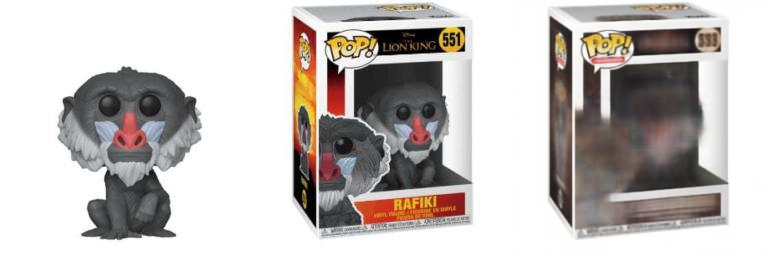

In [28]:
x_try, y_try = list_val[9]
depict_input_real_fake(g, x_try, y_try, norm=True)

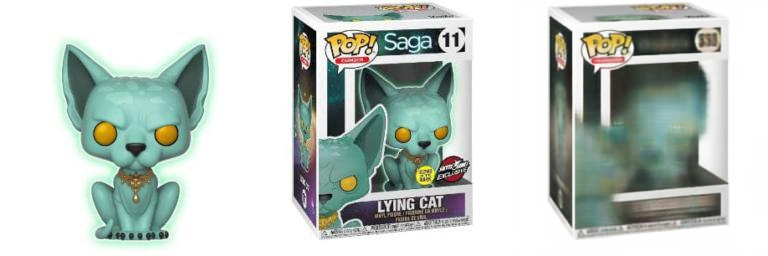

In [30]:
x_try, y_try = list_val[90]
depict_input_real_fake(g, x_try, y_try, norm=True)

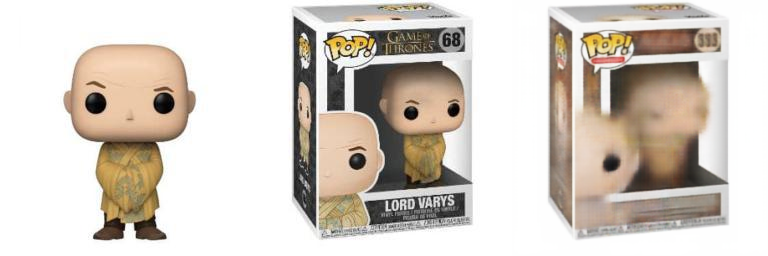

In [18]:
x_try, y_try = list_val[56]
depict_input_real_fake(g, x_try, y_try, norm=True)

These are results from the previously created model:

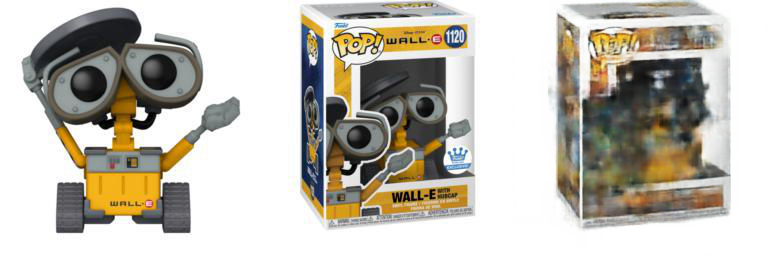

In [ ]:
#x_try, y_try = list_val[55]
#generate_images_PIL(g, x_try, y_try, norm=True)

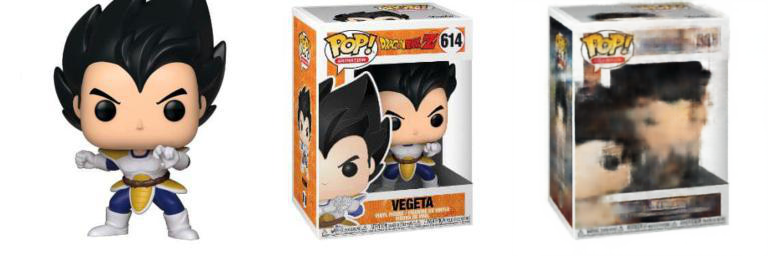

In [ ]:
#x_try, y_try = list_val[89]
#generate_images_PIL(g, x_try, y_try, norm=True)

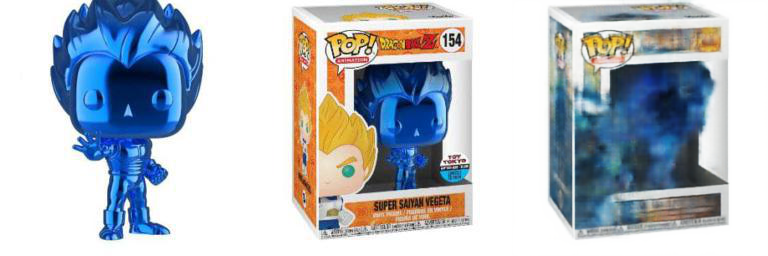

In [ ]:
#x_try, y_try = list_val[49]
#generate_images_PIL(g, x_try, y_try, norm=True)

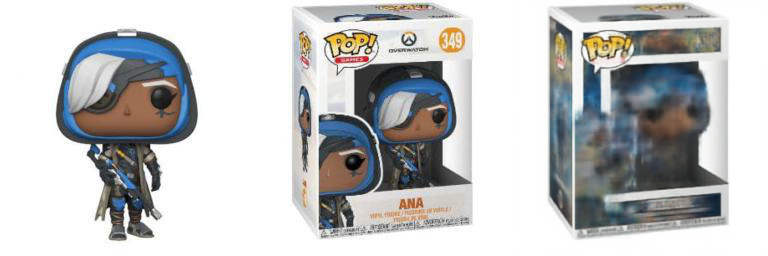

In [ ]:
#x_try, y_try = list_val[32]
#generate_images_PIL(g, x_try, y_try, norm=True)

Easy to see that model learns how to

# Final model

In [32]:
from training1 import *

In [33]:
#!g1.1
#Добавила цвет-ауги
#wandb.init(project='funkopops GAN')
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

g = UNetModel()
d = Discriminator()

g_opt = torch.optim.Adam(g.parameters(), lr=0.0002, betas=(0.5, 0.999))
d_opt = torch.optim.Adam(d.parameters(), lr=0.0002, betas=(0.5, 0.999))

train(g,
          d,
          n_epochs=10,
          generator_opt=g_opt,
          discriminator_opt=d_opt,
          train_loader=train_loader,
          val_loader=val_loader,
          num_model=701,
          logging=False,
          path_last_epoch='/content/drive/MyDrive/funkopop_gan/models'
          )

100%|██████████| 1000/1000 [01:42<00:00,  9.76it/s]



epoch 0/10 g loss 26.422518215179444 d_loss 0.7815567770302295


100%|██████████| 100/100 [00:03<00:00, 31.85it/s]



val 0/10 g loss 23.12737615585327 d_loss 0.7297750183939934


100%|██████████| 1000/1000 [01:41<00:00,  9.85it/s]



epoch 1/10 g loss 24.452844854354858 d_loss 0.7705435354560614


100%|██████████| 100/100 [00:03<00:00, 32.28it/s]



val 1/10 g loss 24.492243118286133 d_loss 0.7320273898541927


100%|██████████| 1000/1000 [01:41<00:00,  9.85it/s]



epoch 2/10 g loss 23.638165763854982 d_loss 0.7718320333510638


100%|██████████| 100/100 [00:03<00:00, 31.50it/s]



val 2/10 g loss 22.878692197799683 d_loss 0.6756160011887551


100%|██████████| 1000/1000 [01:41<00:00,  9.85it/s]



epoch 3/10 g loss 23.041391138076783 d_loss 0.7682424603849649


100%|██████████| 100/100 [00:03<00:00, 31.23it/s]



val 3/10 g loss 24.154564800262452 d_loss 0.9522989490628242


100%|██████████| 1000/1000 [01:41<00:00,  9.86it/s]



epoch 4/10 g loss 22.771058647155762 d_loss 0.7706694278120995


100%|██████████| 100/100 [00:03<00:00, 31.89it/s]



val 4/10 g loss 22.57708047866821 d_loss 0.5795911265909672


100%|██████████| 1000/1000 [01:41<00:00,  9.84it/s]



epoch 5/10 g loss 21.985103758811952 d_loss 0.8051200033724308


100%|██████████| 100/100 [00:03<00:00, 32.03it/s]



val 5/10 g loss 23.180176525115968 d_loss 0.6974634797871113


100%|██████████| 1000/1000 [01:41<00:00,  9.85it/s]



epoch 6/10 g loss 21.407596214294433 d_loss 0.8066631278097629


100%|██████████| 100/100 [00:03<00:00, 31.20it/s]



val 6/10 g loss 22.245242490768433 d_loss 0.7281444251537323


100%|██████████| 1000/1000 [01:41<00:00,  9.87it/s]



epoch 7/10 g loss 20.83445440673828 d_loss 0.8031868274956941


100%|██████████| 100/100 [00:03<00:00, 32.01it/s]



val 7/10 g loss 21.94814392089844 d_loss 0.7469788226485252


100%|██████████| 1000/1000 [01:41<00:00,  9.85it/s]



epoch 8/10 g loss 20.338975305557252 d_loss 0.8191679626107216


100%|██████████| 100/100 [00:03<00:00, 32.08it/s]



val 8/10 g loss 23.61409288406372 d_loss 0.8688596060872078


100%|██████████| 1000/1000 [01:41<00:00,  9.84it/s]



epoch 9/10 g loss 19.84322272872925 d_loss 0.7832031704634428


100%|██████████| 100/100 [00:03<00:00, 31.72it/s]


val 9/10 g loss 21.555449237823485 d_loss 0.7094490218162537


# Testing final model

In [34]:
#!g1.1
g = UNetModel()
#Первая модель (без аугов, дискриминатор-генератор) носит название first
g.load_state_dict(torch.load('/content/drive/MyDrive/funkopop_gan/models/gen_701.pt'))

<All keys matched successfully>

In [35]:
list_val = list(val_loader)

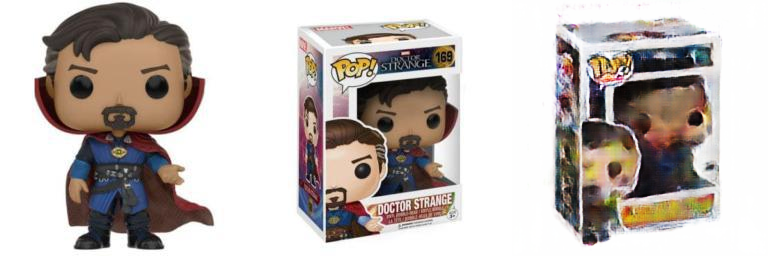

In [36]:
x_try, y_try = list_val[56]
depict_input_real_fake(g, x_try, y_try, norm=True)

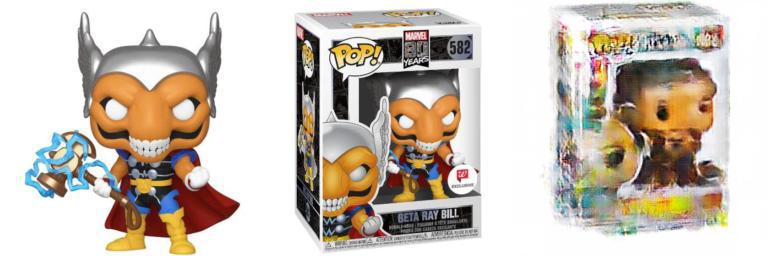

In [37]:
x_try, y_try = list_val[9]
depict_input_real_fake(g, x_try, y_try, norm=True)

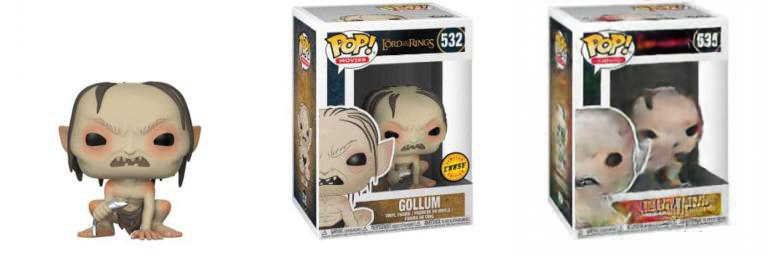

In [ ]:
#x_try, y_try = val_list[90]
#generate_images_PIL(g, x_try, y_try, norm=True)

Right background, almost same number

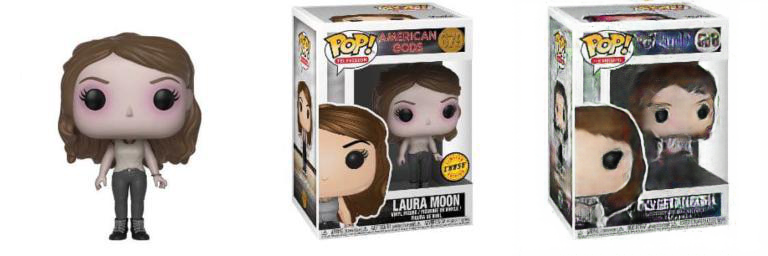

In [ ]:
#x_try, y_try = val_list[0]
#generate_images_PIL(g, x_try, y_try, norm=True)

Very similar

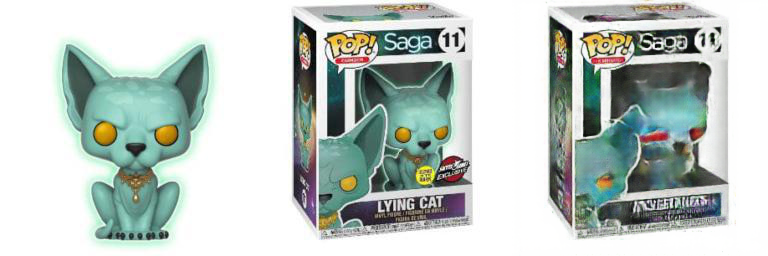

In [ ]:
#x_try, y_try = val_list[3]
#generate_images_PIL(g, x_try, y_try, norm=True)

There was a similar cat in the training set (only with red eyes), so the model really reproduced the result

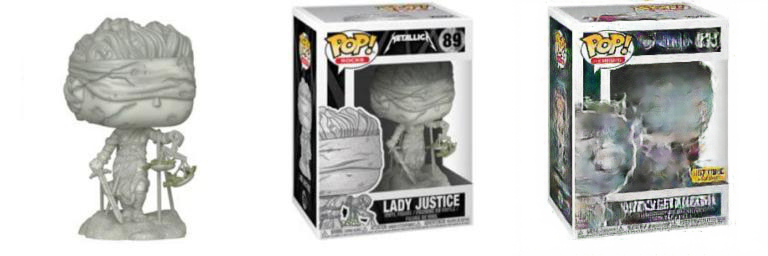

In [ ]:
#x_try, y_try = val_list[17]
#generate_images_PIL(g, x_try, y_try, norm=True)

It added a sticker which is not needed (but you cannot really understand if you need to place a sticker)

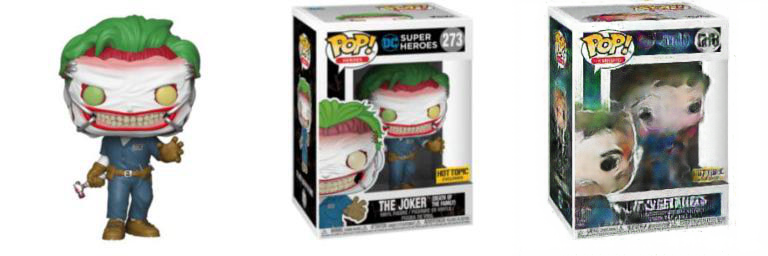

In [ ]:
#x_try, y_try = val_list[18]
#generate_images_PIL(g, x_try, y_try, norm=True)

And here it mostly got the sticker!